In [4]:
from pandas_datareader import data
import matplotlib.pyplot as plt
from mpl_finance import candlestick2_ohlc
import matplotlib.dates as mdates
import fix_yahoo_finance as yf
import datetime

start = datetime.date(2018, 1, 1)
end = datetime.date.today()

aapl = yf.download("AAPL",start,end) 
aapl.reset_index(inplace=True)

aapl['Date'] = aapl.index.map(mdates.date2num)

fig, ax = plt.subplots()
plt.xlabel("Date")
plt.ylabel("Price")

candlestick2_ohlc(ax, aapl.Open, aapl.High, aapl.Low, aapl.Close, width=1, colorup='g')
plt.savefig('my_figure.png')
plt.show()

C:\Users\91771\anaconda3\lib\site-packages\pandas_datareader\compat\__init__.py:7: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.

C:\Users\91771\anaconda3\lib\site-packages\mpl_finance.py:22: DeprecationWarning:





    Please use `mplfinance` instead (no hyphen, no underscore).

    To install: `pip install --upgrade mplfinance` 

   For more information, see: https://pypi.org/project/mplfinance/



C:\Users\91771\anaconda3\lib\site-packages\fix_yahoo_finance\__init__.py:0: DeprecationWarning:



*** `fix_yahoo_finance` was renamed to `yfinance`. ***
Please install and use `yfinance` directly using `pip install yfinance -U`

More information: https://github.com/ranaroussi/yfinance




[*********************100%***********************]  1 of 1 completed


AttributeError: 'int' object has no attribute 'toordinal'

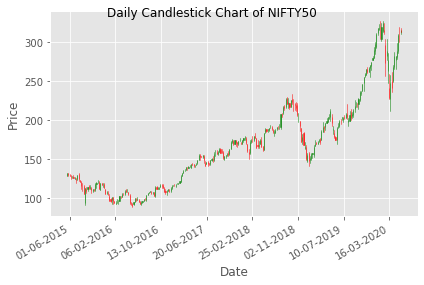

In [6]:
import matplotlib.pyplot as plt
from mpl_finance import candlestick_ohlc
import pandas as pd
import matplotlib.dates as mpl_dates

plt.style.use('ggplot')

# Extracting Data for plotting
data = pd.read_csv('AAPL.csv')
ohlc = data.loc[:, ['Date', 'Open', 'High', 'Low', 'Close']]
ohlc['Date'] = pd.to_datetime(ohlc['Date'])
ohlc['Date'] = ohlc['Date'].apply(mpl_dates.date2num)
ohlc = ohlc.astype(float)

# Creating Subplots
fig, ax = plt.subplots()

candlestick_ohlc(ax, ohlc.values, width=0.6, colorup='green', colordown='red', alpha=0.8)

# Setting labels & titles
ax.set_xlabel('Date')
ax.set_ylabel('Price')
fig.suptitle('Daily Candlestick Chart of NIFTY50')

# Formatting Date
date_format = mpl_dates.DateFormatter('%d-%m-%Y')
ax.xaxis.set_major_formatter(date_format)
fig.autofmt_xdate()

fig.tight_layout()

plt.show()

In [20]:
import plotly.graph_objects as go
import matplotlib
import pandas as pd
from datetime import datetime

df = pd.read_csv('AAPL.csv')

def mouse_move(event):
    x, y = event.xdata, event.ydata
    print(x, y)


plt.connect('motion_notify_event', mouse_move)


fig = go.Figure(data=[go.Candlestick(x=df.Date,open=df.Open,
                high=df.High,
                low=df.Low,
                close=df.Close)])



fig.update_layout(xaxis_rangeslider_visible=False)

fig.show()

None None
None None
None None
None None
None None
None None
None None
None None
None None
None None
None None
None None
None None
None None
None None
None None
None None
None None
None None
None None
None None
None None
None None
None None
None None
None None
None None
None None
None None
None None
None None
None None
None None
None None
None None
None None
None None
None None
None None
None None
None None
None None
None None
None None
None None
None None
None None
None None
None None
None None
None None
None None
None None
None None
None None
None None
None None
None None
None None
None None
None None
None None
None None
None None
None None
None None
None None
None None
None None
None None
None None
None None
None None
None None
None None
None None


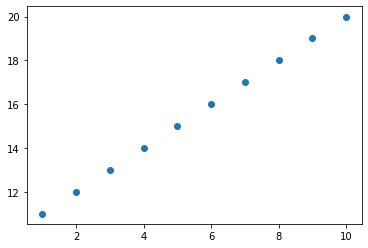

In [11]:
import numpy as np
import matplotlib.pyplot as plt

N = 50
x = [1,2,3,4,5,6,7,8,9,10]
y = [11,12,13,14,15,16,17,18,19,20]

plt.scatter(x, y)
plt.show()

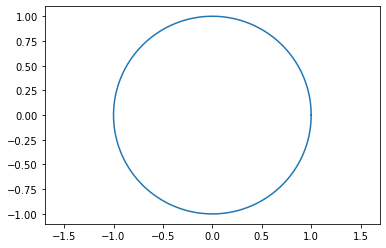

In [12]:
import matplotlib.pyplot as plt
import numpy as np


def plot_unit_circle():
    angs = np.linspace(0, 2 * np.pi, 10**6)
    rs = np.zeros_like(angs) + 1
    xs = rs * np.cos(angs)
    ys = rs * np.sin(angs)
    plt.plot(xs, ys)


def mouse_move(event):
    x, y = event.xdata, event.ydata
    print(x, y)


plt.connect('motion_notify_event', mouse_move)
plot_unit_circle()
plt.axis('equal')
plt.show()

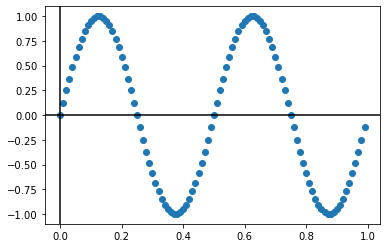

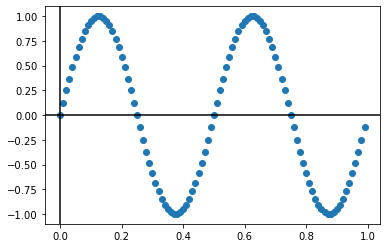

In [9]:
import matplotlib.pyplot as plt
import numpy as np


class Cursor(object):
    def __init__(self, ax):
        self.ax = ax
        self.lx = ax.axhline(color='k')  # the horiz line
        self.ly = ax.axvline(color='k')  # the vert line

        # text location in axes coords
        self.txt = ax.text(0.7, 0.9, '', transform=ax.transAxes)

    def mouse_move(self, event):
        if not event.inaxes:
            return

        x, y = event.xdata, event.ydata
        # update the line positions
        self.lx.set_ydata(y)
        self.ly.set_xdata(x)

        self.txt.set_text('x=%1.2f, y=%1.2f' % (x, y))
        self.ax.figure.canvas.draw()


class SnaptoCursor(object):
    """
    Like Cursor but the crosshair snaps to the nearest x, y point.
    For simplicity, this assumes that *x* is sorted.
    """

    def __init__(self, ax, x, y):
        self.ax = ax
        self.lx = ax.axhline(color='k')  # the horiz line
        self.ly = ax.axvline(color='k')  # the vert line
        self.x = x
        self.y = y
        # text location in axes coords
        self.txt = ax.text(0.7, 0.9, '', transform=ax.transAxes)

    def mouse_move(self, event):
        if not event.inaxes:
            return

        x, y = event.xdata, event.ydata
        indx = min(np.searchsorted(self.x, x), len(self.x) - 1)
        x = self.x[indx]
        y = self.y[indx]
        # update the line positions
        self.lx.set_ydata(y)
        self.ly.set_xdata(x)

        self.txt.set_text('x=%1.2f, y=%1.2f' % (x, y))
        print('x=%1.2f, y=%1.2f' % (x, y))
        self.ax.figure.canvas.draw()


t = np.arange(0.0, 1.0, 0.01)
s = np.sin(2 * 2 * np.pi * t)

fig, ax = plt.subplots()
ax.plot(t, s, 'o')
cursor = Cursor(ax)
fig.canvas.mpl_connect('motion_notify_event', cursor.mouse_move)

fig, ax = plt.subplots()
ax.plot(t, s, 'o')
snap_cursor = SnaptoCursor(ax, t, s)
fig.canvas.mpl_connect('motion_notify_event', snap_cursor.mouse_move)

plt.show()

In [17]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib
import mpld3
from mpld3 import plugins

fig, ax = plt.subplots()

x = np.linspace(-2, 2, 20)
y = x[:, None]
X = np.zeros((20, 20, 4))


X[:, :, 0] = np.exp(- (x - 1) ** 2 - (y) ** 2)
X[:, :, 1] = np.exp(- (x + 0.71) ** 2 - (y - 0.71) ** 2)
X[:, :, 2] = np.exp(- (x + 0.71) ** 2 - (y + 0.71) ** 2)
X[:, :, 3] = np.exp(-0.25 * (x ** 2 + y ** 2))

im = ax.imshow(X, extent=(10, 20, 10, 20),
               origin='lower', zorder=1, interpolation='nearest')
fig.colorbar(im, ax=ax)

ax.set_title('An Image', size=20)

plugins.connect(fig, plugins.MousePosition(fontsize=14))

mpld3.show()

Using matplotlib backend: Qt5Agg
[-2.         -1.78947368 -1.57894737 -1.36842105 -1.15789474 -0.94736842
 -0.73684211 -0.52631579 -0.31578947 -0.10526316  0.10526316  0.31578947
  0.52631579  0.73684211  0.94736842  1.15789474  1.36842105  1.57894737
  1.78947368  2.        ] [[-2.        ]
 [-1.78947368]
 [-1.57894737]
 [-1.36842105]
 [-1.15789474]
 [-0.94736842]
 [-0.73684211]
 [-0.52631579]
 [-0.31578947]
 [-0.10526316]
 [ 0.10526316]
 [ 0.31578947]
 [ 0.52631579]
 [ 0.73684211]
 [ 0.94736842]
 [ 1.15789474]
 [ 1.36842105]
 [ 1.57894737]
 [ 1.78947368]
 [ 2.        ]]


TypeError: Object of type ndarray is not JSON serializable

In [15]:
import matplotlib.pyplot as plt
import numpy as np
import mplcursors
%matplotlib
data = np.outer(range(10), range(1, 5))

fig, ax = plt.subplots()
lines = ax.plot(data)
ax.set_title("Click somewhere on a line.\nRight-click to deselect.\n"
             "Annotations can be dragged.")

mplcursors.cursor(lines) # or just mplcursors.cursor()

plt.show()

Using matplotlib backend: Qt5Agg
